In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from PIL import Image

In [2]:
table_1 = pd.read_csv('../../데이터/Table/table_1.csv')
table_2 = pd.read_csv('../../데이터/Table/table_2.csv')
table_3 = pd.read_csv('../../데이터/Table/table_3.csv')

table_merge = pd.merge(table_1, table_3, how='left', on='aid')
table_merge = pd.merge(table_merge, table_2, how='left', on='did')

table_merge['gu'] = table_merge['location'].str.split().str[1]
table_merge['dong'] = table_merge['location'].str.split().str[2]

### 아파트 실거래가

In [3]:
# 구별 평균, 표준편차
gu = table_merge.groupby('gu')['price'].agg(['mean', 'std'])
# 구별 평균의 평균
gu_mean_mean = gu['mean'].mean()
# 구별 표준편차의 평균
gu_std_mean = gu['std'].mean()

print(gu_mean_mean, gu_std_mean)

62619.943741345465 26850.41121793319


In [4]:
# 동별 평균, 표준편차
dong = table_merge.groupby(by='dong')['price'].agg(['mean', 'std'])
# 동별 평균의 평균
dong_mean_mean = dong['mean'].mean()
# 동별 표준편차의 평균
dong_std_mean = dong['std'].mean() - 3000

print(dong_mean_mean, dong_std_mean)

64377.87688959049 21682.241935446007


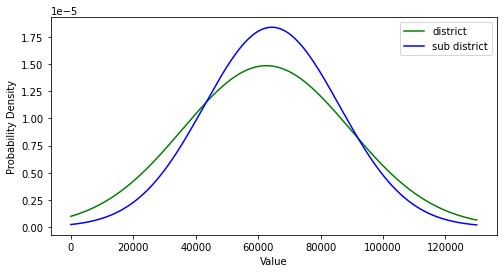

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(0, 130000, 1000)
y_gu = norm.pdf(x, gu_mean_mean, gu_std_mean)
y_dong = norm.pdf(x, dong_mean_mean, dong_std_mean)

plt.figure(figsize=(8, 4))
plt.plot(x, y_gu, label='district', color='green')
plt.plot(x, y_dong, label='sub district', color='blue')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.savefig('../../데이터/Figure/PDF.jpg')

### 라인 그래프

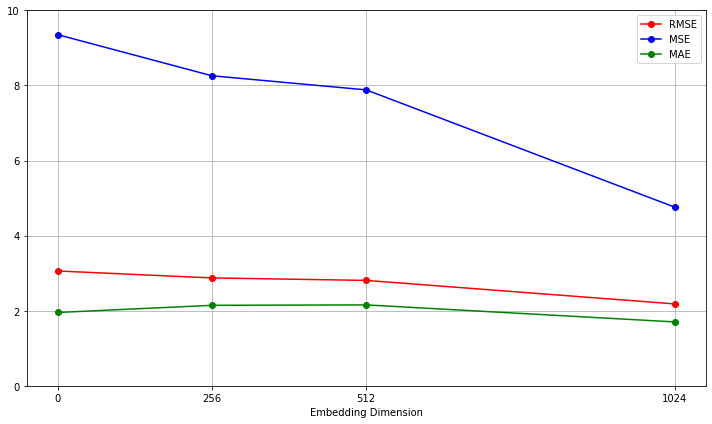

In [9]:
embedding_sizes = [0, 256, 512, 1024]
embedding_rmse_values = [3.0584, 2.8738, 2.8076, 2.1814]
embedding_mse_values = [9.3541, 8.2586, 7.8828, 4.7584]
embedding_mae_values = [1.9533, 2.1438, 2.1551, 1.7017]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(embedding_sizes, embedding_rmse_values, 'ro-', label='RMSE')
ax.plot(embedding_sizes, embedding_mse_values, 'bo-', label='MSE')
ax.plot(embedding_sizes, embedding_mae_values, 'go-', label='MAE')
ax.set_xlabel('Embedding Dimension')
ax.legend()
ax.grid(True)
ax.set_xticks(embedding_sizes)
ax.set_ylim(0, 10)
fig.tight_layout()
fig.savefig('../../데이터/Figure/Line_Embedding.jpg')

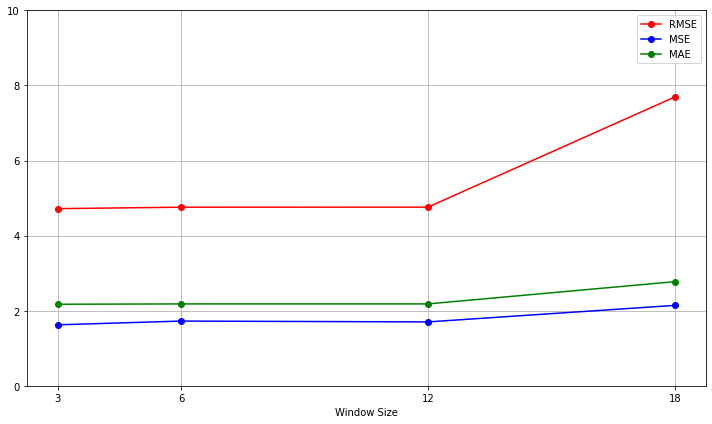

In [10]:
window_sizes = [3, 6, 12, 18]
window_mae_values = [2.1724, 2.1812, 2.1814, 2.7736]
window_rmse_values = [4.7191, 4.7578, 4.7584, 7.6931]
window_mse_values = [1.6243, 1.7245, 1.7017, 2.1420]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(window_sizes, window_rmse_values, 'ro-', label='RMSE')
ax.plot(window_sizes, window_mse_values, 'bo-', label='MSE')
ax.plot(window_sizes, window_mae_values, 'go-', label='MAE')
ax.set_xlabel('Window Size')
ax.legend()
ax.grid(True)
ax.set_xticks(window_sizes)
ax.set_ylim(0, 10)
fig.tight_layout()
fig.savefig('../../데이터/Figure/Line_Window.jpg')

### 막대 그래프

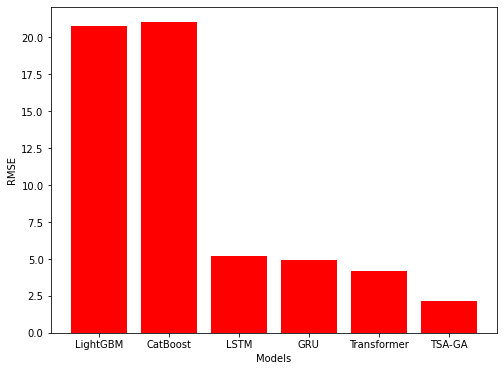

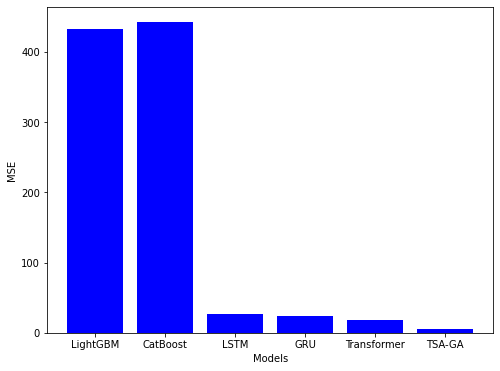

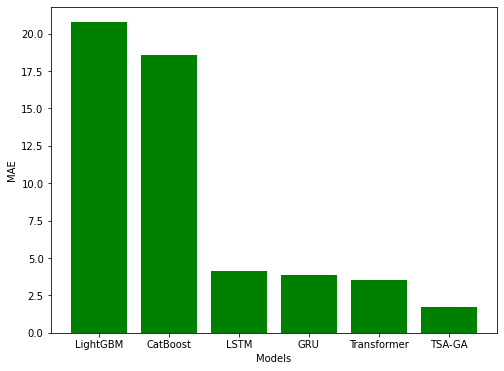

In [11]:
model = ['LightGBM', 'CatBoost', 'LSTM', 'GRU', 'Transformer', 'TSA-GA']
rmse = [20.7914, 21.0314, 5.1713, 4.9356, 4.1943, 2.1814]
mse = [432.2820, 442.3216, 26.7419, 24.3597, 17.5922, 4.7584]
mae = [20.7664, 18.5840, 4.1029, 3.8586, 3.5029, 1.7017]

data = [rmse, mse, mae]
losses = ['RMSE', 'MSE', 'MAE']
colors = ['red', 'blue', 'green']

fig_paths = []
for i, loss in enumerate(losses):
    plt.figure(figsize=(8, 6))
    plt.bar(model, data[i], color=colors[i])
    plt.xlabel('Models')
    plt.ylabel(loss)
    fig_path = f'../../데이터/Figure/Bar_{losses[i]}.jpg'
    plt.savefig(fig_path)
    fig_paths.append(fig_path)

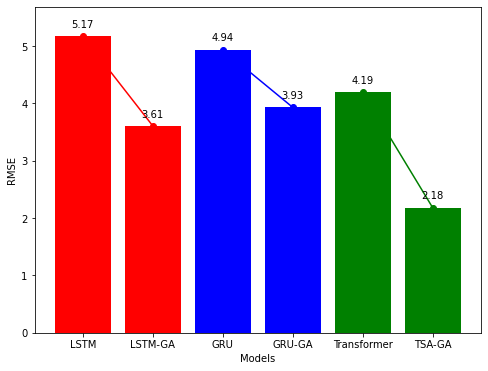

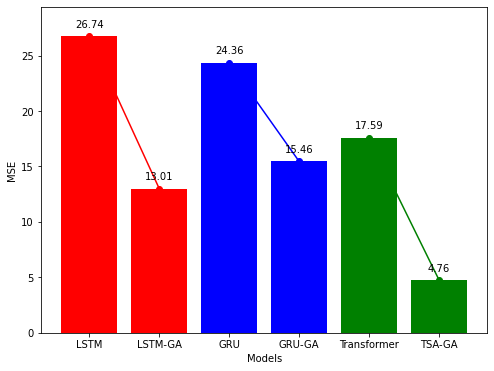

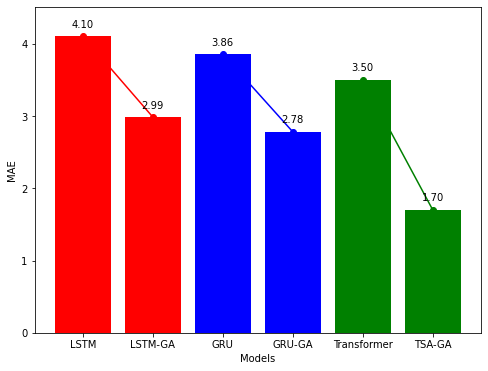

In [12]:
model = ['LSTM', 'LSTM-GA', 'GRU', 'GRU-GA', 'Transformer', 'TSA-GA']
rmse = [5.1713, 3.6073, 4.9356, 3.9315, 4.1943, 2.1814]
mse = [26.7419, 13.0128, 24.3597, 15.4565, 17.5922, 4.7584]
mae = [4.1029, 2.9851, 3.8586, 2.7812, 3.5029, 1.7017]
losses = ['RMSE', 'MSE', 'MAE']
data = [rmse, mse, mae]
colors = ['red', 'red', 'blue', 'blue', 'green', 'green']
model_indices = range(len(model))
file_paths = []

for i, loss in enumerate(losses):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(model, data[i], color=colors)
    ax.set_xlabel('Models')
    ax.set_ylabel(loss)
    ax.set_xticks(model_indices)
    ax.set_xticklabels(model)
    
    max_value = max(data[i])
    y_upper_limit = max_value + (0.1 * max_value)
    ax.set_ylim(0, y_upper_limit)
    
    for color in set(colors):
        indices = [j for j, x in enumerate(colors) if x == color]
        x_values = [bars[j].get_x() + bars[j].get_width() / 2 for j in indices]
        y_values = [data[i][j] for j in indices]
        ax.plot(x_values, y_values, color=color, marker='o')

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 7),
                    textcoords="offset points",
                    ha='center', va='bottom')

    file_path = f'../../데이터/Figure/Bar_GA_{losses[i]}.jpg'
    plt.savefig(file_path)
    file_paths.append(file_path)

### 고해상도 변환

In [3]:
def convert_to_600dpi(input_path, output_path):
    with Image.open(input_path) as img:
        if img.mode == 'RGBA':
            img = img.convert('RGB')
        img.save(output_path, dpi=(600, 600))

# image_files = [
#     'Bar_GA_MAE.jpg', 'Bar_GA_MSE.jpg', 'Bar_GA_RMSE.jpg',
#     'Bar_MAE.jpg', 'Bar_MSE.jpg', 'Bar_RMSE.jpg',
#     'Line_Embedding.jpg', 'Line_Window.jpg', 'PDF.jpg'
# ]

image_files = [
    'overall.jpg', 'embedding.jpg', 'TSA.jpg', 'GA.jpg'
]

input_dir = '../../데이터/Figure/original/'
output_dir = '../../데이터/Figure/converted/'
for image_file in image_files:
    input_path = f'{input_dir}{image_file}'
    output_path = f'{output_dir}{image_file}'
    convert_to_600dpi(input_path, output_path)